<a href="https://colab.research.google.com/github/COMP4702-UQ/Pracs-notebook/blob/main/PracW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION & LOGISTIC REGRESSION

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mount google colab to drive to access to the dataset (comment if you don't use Colab + Drive)
# from google.colab import drive
# drive.mount('/content/drive/')

## Q1

### (a)

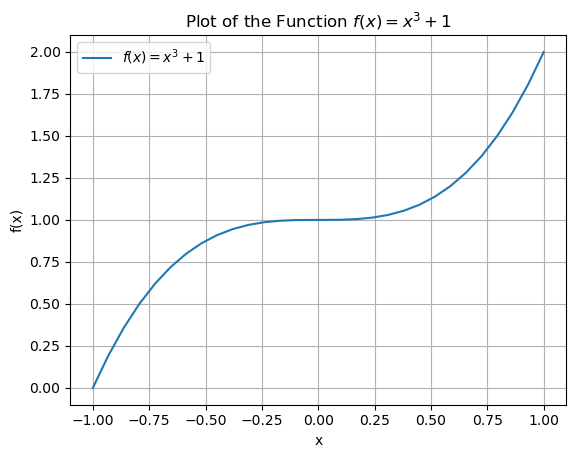

In [7]:
# TODO: Define the function
def f(x):
    return x**3 + 1

# TODO: Generate x values in the specified domain
x_values = np.linspace(-1, 1, 30)

# TODO: Calculate corresponding y values using the function
y_values = f(x_values)

# Plot the function
plt.plot(x_values, y_values, label=r'$f(x) = x^3 + 1$')
plt.title('Plot of the Function $f(x) = x^3 + 1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

### (b)

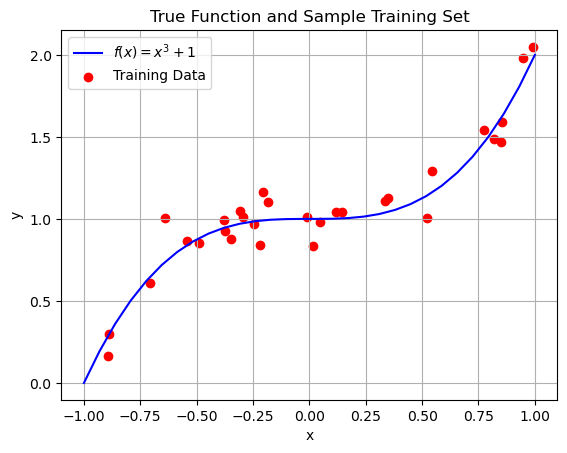

In [8]:
# TODO: Generate 30 random x values in the specified domain
np.random.seed(50)  # for reproducibility
sample_training_x = np.random.uniform(-1, 1, 30)

# TODO: Calculate corresponding y values using the true function and add Gaussian noise
y =  f(sample_training_x)
noise = np.random.normal(loc=0.0, scale=0.1, size=sample_training_x.shape)
sample_training_y = y + noise

# Plot the true function
plt.plot(x_values, y_values, label=r'$f(x) = x^3 + 1$', color='blue')

# Plot the noisy data points
plt.scatter(sample_training_x, sample_training_y, color='red', label='Training Data')

# Add labels and legend
plt.title('True Function and Sample Training Set')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### (c)

Training Set Sum of Squares Error (MSE): 0.0351


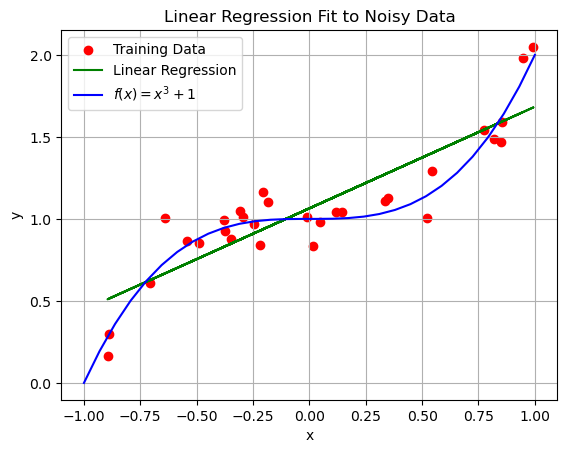

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TODO: Reshape the data for sklearn (if needed)
X_train = sample_training_x.reshape(-1, 1)
y_train = sample_training_y

# TODO: Perform linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# TODO: Predict y values using the linear model
y_pred = model.predict(X_train)

# TODO: Calculate the sum of squares error
mse = mean_squared_error(y_train, y_pred)
print(f'Training Set Sum of Squares Error (MSE): {mse:.4f}')

plt.scatter(sample_training_x, sample_training_y, color='red', label='Training Data')
plt.plot(sample_training_x, y_pred, color='green', label='Linear Regression')
plt.plot(x_values, y_values, label=r'$f(x) = x^3 + 1$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit to Noisy Data')
plt.legend()
plt.grid(True)
plt.show()

### (d)

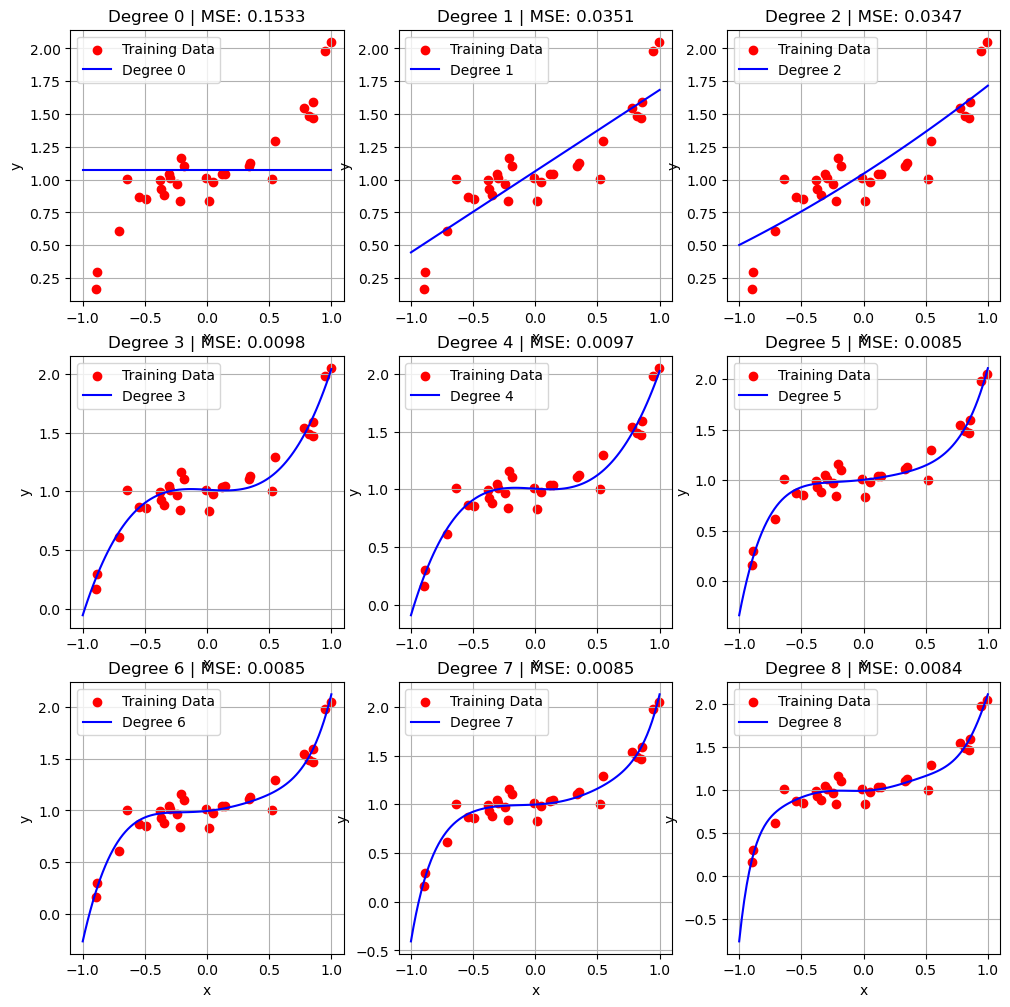

In [16]:
# Perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures

mses = [] # Store MSE for each degree for visualization (optional)

plt.figure(figsize=(12, 12))
x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)

# Experiment with different polynomial orders
for degree in range(9):
  plt.subplot(3, 3,degree + 1)  # Creating matplotlib frame for plotting

  # TODO: Polynomial regression
  poly = PolynomialFeatures(degree)
  X_poly = poly.fit_transform(sample_training_x.reshape(-1, 1))
  X_plot_poly = poly.transform(x_plot)

  # TODO: Predict y values using the polynomial model
  model = LinearRegression()
  model.fit(X_poly, sample_training_y)
  sample_training_y_pred = model.predict(X_poly)
  y_plot_pred = model.predict(X_plot_poly)

  # TODO: Calculate the sum of squares error
  mse = mean_squared_error(sample_training_y, sample_training_y_pred)
  mses.append(mse)

  # Plot the polynomial function for current degree (remember to sort the x_train and sample_training_y_pred of x_train for a nice visualization)
  plt.scatter(sample_training_x, sample_training_y, color='red', label='Training Data')
  plt.plot(x_plot, y_plot_pred, color='blue', label=f'Degree {degree}')
  plt.title(f'Degree {degree} | MSE: {mse:.4f}')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.grid(True)
  plt.legend()

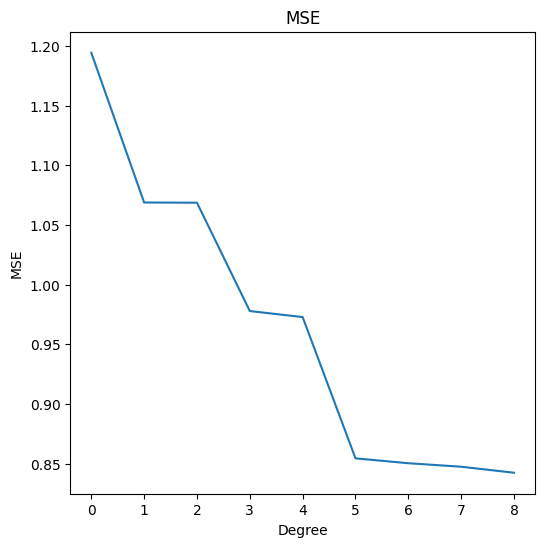

In [ ]:
# Plot MSE
plt.figure(figsize=(6,6))
plt.plot(np.arange(0, 9, 1), mses)
plt.title('MSE')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.show()

## Q2

### (b)

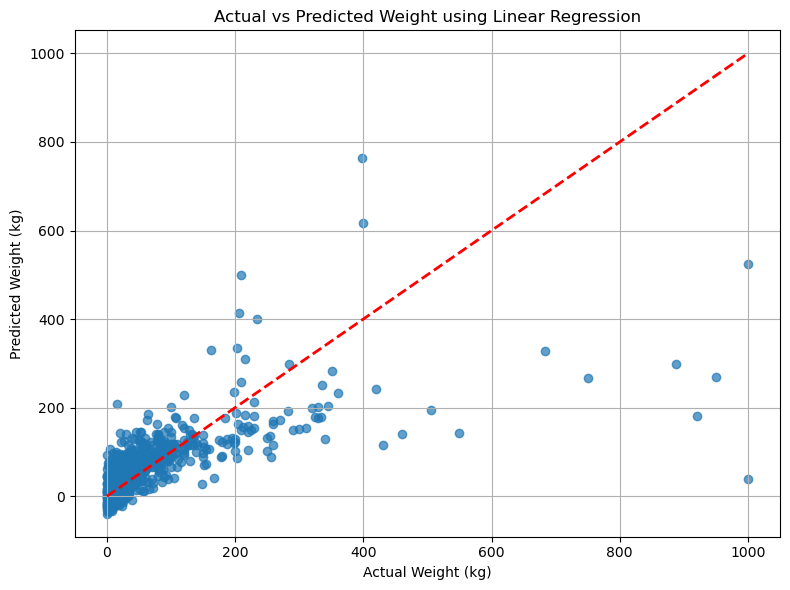

In [18]:
# Load dataset
data = pd.read_csv('pokemonregr.csv')  # Replace with full path if needed

# Handle missing data: drop rows with NaNs
data_clean = data.dropna()

# Define features (X) and target (y)
X = data_clean.drop(columns='weight_kg')
y = data_clean['weight_kg']

# Define and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the trained model
y_pred_all = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_all, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Actual vs Predicted Weight using Linear Regression')
plt.grid(True)
plt.tight_layout()
plt.show()


### (c)

In [ ]:
# TODO: Coefficients of Linear Model (hint: look at the document of LinearRegression() in sklearn)



,0,1
0,attack,0.357074
1,defense,0.551564
2,height_m,53.843880
3,sp_attack,0.015288
4,sp_defense,0.158542
5,speed,-0.394064


### (e)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Load and clean dataset
data = pd.read_csv('pokemonregr.csv')
data_clean = data.dropna()

# Separate features and target
X_raw = data_clean.drop(columns='weight_kg')
y = data_clean['weight_kg']

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_raw)

# Define and fit linear regression model
model = LinearRegression()
model.fit(X_normalized, y)

# Get coefficients
coefficients = model.coef_
intercept = model.intercept_

# Display coefficients
coef_df = pd.DataFrame({
    'Feature': X_raw.columns,
    'Normalized Coefficient': coefficients
})

# Add intercept
intercept_row = pd.DataFrame([{'Feature': 'Intercept', 'Normalized Coefficient': intercept}])
coef_df = pd.concat([intercept_row, coef_df], ignore_index=True)

print(coef_df)

      Feature  Normalized Coefficient
0   Intercept              -45.110164
1      attack               67.931560
2     defense              127.737342
3    height_m              770.610607
4   sp_attack                4.526377
5  sp_defense               32.225137
6       speed              -73.769468


## Q3

### (a)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
w3classif = pd.read_csv('w3classif.csv', header=None) # if use Colab + Drive, specify the full path

# TODO: Define X, y
X = w3classif[[0, 1]].values
y = w3classif[2].values

# TODO: Standardize the features (optional but often recommended for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# TODO: Create and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_scaled, y)

# Display the model parameters (coefficients and intercept)
print("Model Coefficients:", logreg_model.coef_)
print("\nModel Intercept:",logreg_model.intercept_)

Model Coefficients: [[2.90589536 3.01711333]]

Model Intercept: [0.60005739]


### (b)

In [24]:
# TODO: Standardize the test data point using the same scaler

# TODO: Predict the probability of class 1 for the test data point
probability_y1 = ...

print("Probability p(y' = 1 | x'):", probability_y1[0])

TypeError: 'ellipsis' object is not subscriptable

### (c)

In [23]:
# Generate a meshgrid of points for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Standardize the meshgrid points using the same scaler
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_points_scaled = scaler.transform(meshgrid_points)

# TODO: Predict the class labels for the meshgrid points

# TODO: Reshape the predictions to match the shape of the meshgrid

# Plot the decision boundary and data points
plt.contourf(xx, yy, predictions, cmap='RdYlBu', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', marker='o', s=100)

# Plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')

# Show the plot
plt.show()

NameError: name 'predictions' is not defined